<<=====VISUALISING OUR TRAINING SET (USING PCA)=====>>

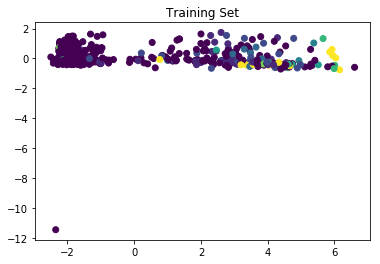

In [1]:
import numpy as np
import DecisionTree as decTree

def PCA(X,dim=2):
    """
    A function to perform PRINCIPAL COMPONENT ANALYSIS
    which would be required to viusalise the data, as
    the data consists of multiple dimensions.
    The default parameter for the reduced number of dimensions
    is set to be 2
    """
    Mean = np.mean(X, axis=0)
    X_normal=(X-Mean)/(np.std(X,axis=0))     # MEAN NORMALISATION 
    cov = np.cov(X_normal.T) # COVARIANCE MATRIX
    evals , evecs = np.linalg.eig(cov) 
    ind = np.argsort(evals)[::-1]  # SORTING THE EIGEN VALUES IN DESCENDING ORDER
    evecs = evecs[:,ind]          # SORTING THE EIGEN VECTORS ACCORDINGLY
    X_reduced = np.dot(X_normal,evecs[:,:dim])   # X WITH REDUCED DIMENSIONS
    return X_reduced

data=np.genfromtxt('breast_cancer_data.txt',delimiter=',')
np.random.shuffle(data); # Since data given is sorted
X=data[:,1:-1] #neglecting first column as it is patient id which is useless for prediction
Y=np.array(data[:,-1],np.int64) # Converting Y to integer numpy array
X=data[:,:-1]
sz=X.shape[0] # here, normalisation isn't required

# separation of training set and test set
test_sz=sz//4  
tr_sz=sz-test_sz 
Xtrain=X[:tr_sz-1,:]
Ytrain=Y[:tr_sz-1]
Xtest=X[tr_sz:,:]
Ytest=Y[tr_sz:]

Xnew=PCA(X)   # Using PCA to reduce the dimensions of dataset to 2 
                # Just for VISUALISATION in 2-D

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(Xnew[:tr_sz-1,0],Xnew[:tr_sz-1,1],c=Ytrain)
plt.title('Training Set')
plt.show()

In [2]:
train=decTree.decTree()
train.set(Xtrain,Ytrain)

#calculating accuracy of the model on test data
Accuracy=train.accuracy(Xtest,Ytest)
print("accuracy of my model= %0.2f" %(Accuracy),"%")

accuracy of my model= 72.99 %


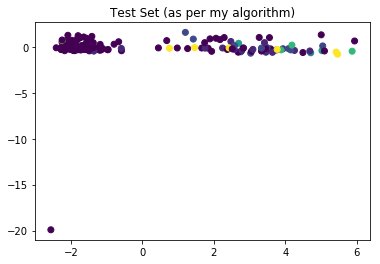

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(Xnew[tr_sz:,0],Xnew[tr_sz:,1],c=train.predict(Xtest))
plt.title('Test Set (as per my algorithm)')
plt.show()

<====Comparing accuracy with Sci-kit Learn====>>

In [4]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(Xtrain, Ytrain)

#Predict Output
predicted= model.predict(Xtest)

# Testing accuracy of prediction on test set
acc=(sum(predicted==Ytest)/test_sz)*100
print("The accuracy on the test set is: %0.2f " %acc, " %")


The accuracy on the test set is: 72.99   %


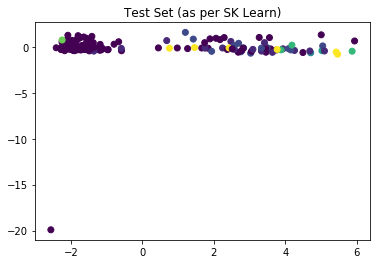

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(Xnew[tr_sz:,0],Xnew[tr_sz:,1],c=predicted)
plt.title('Test Set (as per SK Learn)')
plt.show()
